# Кейс по скоринговой аналитике средствами Python

[Источник](https://archive.ics.uci.edu/ml/datasets/Adult) датасета 

Подключаем библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# формируем датафрейм
data = pd.read_csv('./CSV_Datasets/adult.csv', sep=',', encoding = 'utf-8')

In [11]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearincome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Посмотрим на резмерность датасета и прочие параметры

In [12]:
data.shape

(32561, 15)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
yearincome        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Посмотрим на состав текстовых полей

In [16]:

for i in data.select_dtypes('object').columns:
    print(i)
    print(np.unique(data[i]))

workclass
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
education
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
marital-status
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
occupation
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
relationship
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
race
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
sex
[' Female' ' Male']
native-country
[' ?' ' Cambodia' ' Canada' ' China' ' Columbia

Как видим, кое-где есть значение '?' , которое означает отсутствие информации

Пройдемся по полям

In [17]:
data['age'].head()

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

Посмотрим на значения по возрасту

In [21]:
print('Максимальный возраст: %d лет.' %data['age'].max())
print('Минимальный возраст: %d лет.'%data['age'].min())
print('Средний возраст: %d лет.'%data['age'].mean())
print('Медианный возраст: %d лет.'%data['age'].median())

Максимальный возраст: 90 лет.
Минимальный возраст: 17 лет.
Средний возраст: 38 лет.
Медианный возраст: 37 лет.


А теперь разобъем все значения возраста на 10 отрезков и посмотрим, как распределится
количество анкетируемых

In [23]:
bins = pd.cut(data['age'],10).value_counts().sort_index()
bins

(16.927, 24.3]    5570
(24.3, 31.6]      5890
(31.6, 38.9]      6048
(38.9, 46.2]      6163
(46.2, 53.5]      3967
(53.5, 60.8]      2591
(60.8, 68.1]      1595
(68.1, 75.4]       496
(75.4, 82.7]       174
(82.7, 90.0]        67
Name: age, dtype: int64

Построим бар чарт, чтобы визуализировать наше исследование

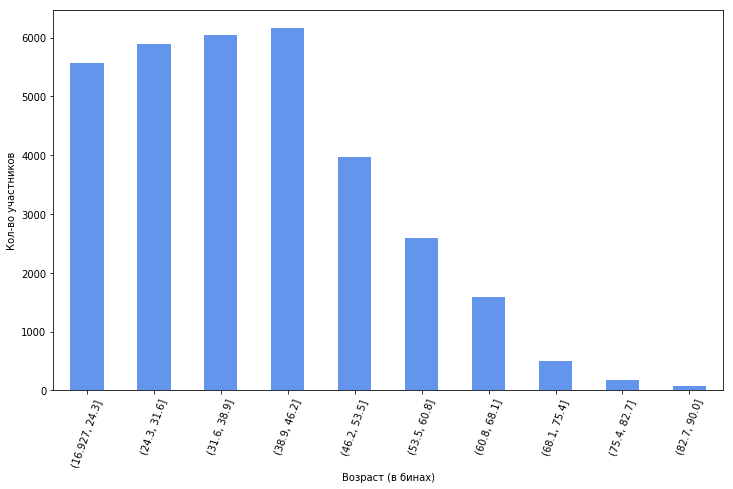

In [34]:
bins.plot(kind='bar', color='cornflowerblue',figsize=(12,7))
plt.ylabel('Кол-во участников')
plt.xlabel('Возраст (в бинах)')
plt.xticks(rotation=70)
plt.show()

Изучим подробнее данные об образовании

In [29]:
# состав значений поля
data.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [31]:
# с количеством по значениям
data.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [32]:
# а если то же, но в процентах от тотала участников
round(data.education.value_counts(normalize=True)*100,2)

 HS-grad         32.25
 Some-college    22.39
 Bachelors       16.45
 Masters          5.29
 Assoc-voc        4.24
 11th             3.61
 Assoc-acdm       3.28
 10th             2.87
 7th-8th          1.98
 Prof-school      1.77
 9th              1.58
 12th             1.33
 Doctorate        1.27
 5th-6th          1.02
 1st-4th          0.52
 Preschool        0.16
Name: education, dtype: float64

Интересно посмотреть, как связан рабочий класс и образование.
Построим кросс-таблицу значений по этим полям

In [35]:
pd.crosstab(data['education'],data['workclass'], normalize=True)*100

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
education,,,,,,,,,
10th,0.307116,0.018427,0.095206,0.006142,2.134455,0.058352,0.205768,0.039925,0.000000
11th,0.362397,0.027640,0.110562,0.003071,2.834680,0.042996,0.184270,0.042996,0.000000
12th,0.122846,0.015356,0.058352,0.000000,1.022696,0.021498,0.058352,0.030712,0.000000
1st-4th,0.036854,0.000000,0.012285,0.000000,0.417678,0.006142,0.039925,0.003071,0.000000
5th-6th,0.092135,0.003071,0.027640,0.000000,0.816928,0.012285,0.058352,0.012285,0.000000
7th-8th,0.221123,0.006142,0.085992,0.003071,1.302171,0.042996,0.288689,0.030712,0.003071
9th,0.156629,0.009213,0.070637,0.000000,1.188538,0.030712,0.104419,0.018427,0.000000
Assoc-acdm,0.144344,0.168914,0.270262,0.000000,2.238875,0.107491,0.218052,0.125918,0.003071
Assoc-voc,0.187341,0.116704,0.264120,0.000000,3.086515,0.116704,0.331685,0.141273,0.000000


Посмотрим, у какой группы больше всего прирост капитала

In [36]:
data.groupby('workclass')['capital-gain'].sum().sort_values(ascending=False)

workclass
 Private             20181687
 Self-emp-inc         5441274
 Self-emp-not-inc     4792483
 Local-gov            1842264
 ?                    1114077
 State-gov             910806
 Federal-gov           799903
 Without-pay             6830
 Never-worked               0
Name: capital-gain, dtype: int64

То же, но по средним значениям

In [37]:
data.groupby('workclass')['capital-gain'].mean().sort_values(ascending=False)

workclass
 Self-emp-inc        4875.693548
 Self-emp-not-inc    1886.061787
 Private              889.217792
 Local-gov            880.202580
 Federal-gov          833.232292
 State-gov            701.699538
 ?                    606.795752
 Without-pay          487.857143
 Never-worked           0.000000
Name: capital-gain, dtype: float64

In [39]:
#добавим еще один уровень группировки - семейный статус и оформим в удобном табличном виде
data.groupby(['workclass', 'marital-status'])['capital-gain'].mean().unstack()

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
workclass,,,,,,,
?,236.668478,1326.5,1147.649371,0.000000,327.763708,151.757576,502.542484
Federal-gov,316.089286,0.0,1064.976645,1512.818182,824.942857,765.307692,181.833333
Local-gov,738.525745,NaN,1223.948192,391.545455,540.807547,177.396825,130.593023
Never-worked,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
Private,577.412953,0.0,1546.778463,555.592715,296.430002,642.669761,422.704082
Self-emp-inc,3942.330000,NaN,5824.813620,665.000000,720.320000,239.350000,2535.172414
Self-emp-not-inc,1886.821918,3649.0,2008.205357,1294.322581,1644.826406,77.377358,1939.040541
State-gov,576.404762,0.0,1092.027211,2168.941176,216.757869,335.046512,263.423077
Without-pay,NaN,NaN,301.750000,0.000000,1104.000000,NaN,0.000000


А можно, как-то добавить визуализации ?

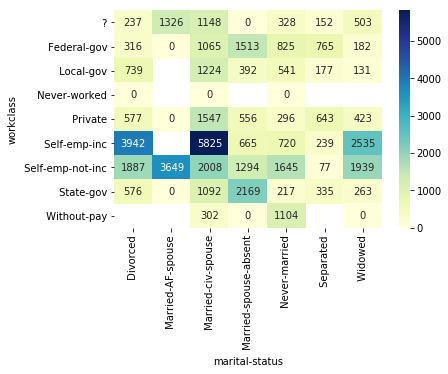

In [40]:
sns.heatmap(data.groupby(['workclass', 'marital-status'])['capital-gain'].mean().unstack(), annot=True, fmt='.0f',cmap="YlGnBu")
plt.show()

Пояснение: Married-civ-spouse - это гражданские супруги, а Self-emp-inc -это самозанятые
(не путать с российским статусом самозанятого), т.е.частные предприниматели.
Самое темное значение в этом хитмапе на пересечении этих категорий.
Так что согласно этой выборке, капитал больше растет в семьях частных предпринимателей

Хорошо, а можно сюда привязать возраст и посмотреть род занятий?

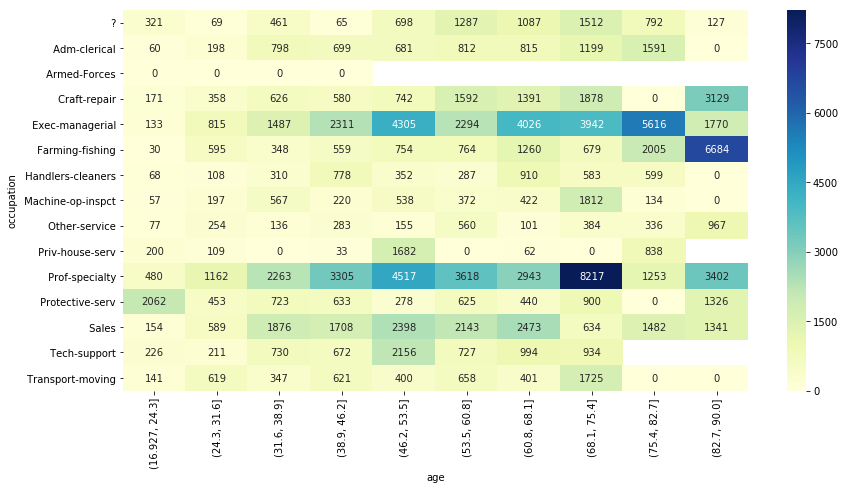

In [45]:
plt.figure(figsize=(14, 7))
sns.heatmap(data.groupby(['occupation',pd.cut(data['age'],10) ])['capital-gain'].mean().unstack(), \
            annot=True, fmt='.0f',cmap="YlGnBu")
plt.show()

Посмотрим, как зависит возраст и уровень дохода

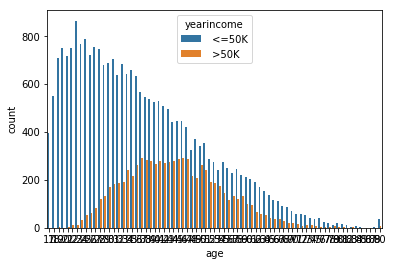

In [47]:
sns.countplot(x='age', hue='yearincome', data=data)
plt.show()

Что-то рябит в глазах. Давайте подправим наш чарт.

In [48]:
low = .05# пятный перцентиль
high = .95 #95-й перцентиль
quant_ages = data['age'].quantile([low, high])# указываем, что надо взять только в этом диапозоне, т.е. отбрасываем выбросы
pd.DataFrame(quant_ages)

,age
0.05,19.0
0.95,63.0


In [49]:
quant_ages.values #получи возраст от 19 до 63

array([19., 63.])

In [50]:
#указываем граничные значения на основе крайних значений массива
_min_boundary = quant_ages.values[0]
_max_boundary = quant_ages.values[1]

In [52]:
#фильтруем дф по граничным значениям
filtered_df = data[(data['age'] > _min_boundary)&(data['age'] < _max_boundary)]

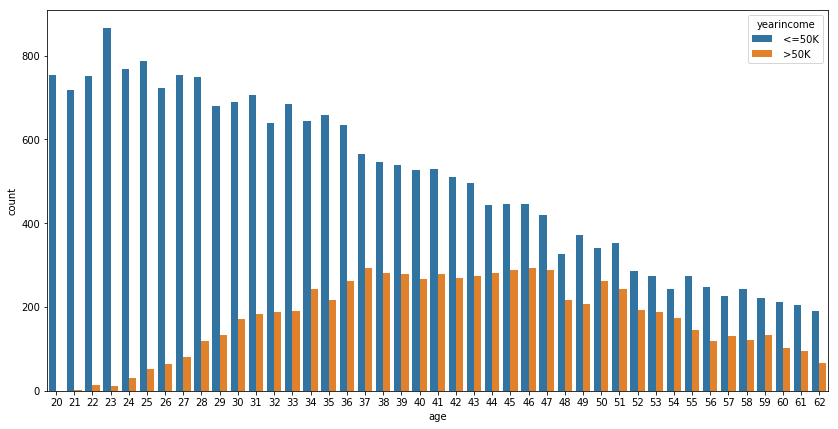

In [55]:
#тот же график. но уже более читабельный
plt.figure(figsize=(14, 7))
sns.countplot(x='age', hue='yearincome', data=filtered_df)
plt.show()

По графику можно сказать, именно в диапазоне от 37 до 47 лет наблюдается максимальное количество участников
с доходом больше 50k в год. Примерно в возрасте 46-47 лет наблюдается максимальное прибижение двух графиков,
это та граница, когда доля людей в выборке с доходом больше 50k в год будет максимальна. На этой информации, например,
можно выстривать кредитную политику в секторе для частных домохозяйств.